In [42]:
import pandas as pd
import numpy as np
import prince
import sidetable
from scipy import stats
import pandas_profiling 
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt

In [2]:
resp = pd.read_csv('https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/BOPInterviews.csv',
                  na_values=0)
meetup = pd.read_csv('https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/brigade_meetup.csv')
msa = pd.read_csv('https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/brigade_msa.csv')

In [3]:
resp

,Timestamp,0.2 Can I confirm that the Brigade you are in is:,"1.0.0 Hosting hack nights, how would you rank this 0 through 6","1.0.1 Days of action (for example, the National Day of Civic Hacking this past September)",1.0.2 Cultivating government partnerships,1.0.3 Cultivating community partnerships,1.0.4 Hosting a workshop to help partners identify user needs,1.0.5 Practicing lean software development,1.0.6 Conducting user testing,1.0.7 Code of Conduct - what happens after the fork - creating strategies for how to deal with Code of Conduct violations,1.0.8 Building a core team,1.0.9 Drafting a strategic plan for your brigade,1.0.10 Drafting a strategic plan for a project,1.0.11 Fundraising,"1.0.12 Tools to manage your brigade, for example: Discourse, Google Groups, Meetup, GitHub Issues, and Slack",1.0.13 Developing a brand and media strategy,1.0.14 Onboarding to the national network,1.0.15 Guide for how to make open-source projects replicable by other brigades,1.0.16 Running a remote brigade,"1.0.17 How to set and achieve DEI (diversity, equity, and inclusion) goals"
0,9/15/20 10:16,Open San Diego,3.0,3.0,4,4,4.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0
1,9/18/20 11:03,Code for Fort Collins,2.0,4.0,5,5,4.0,3.0,5.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,5.0,4.0
2,10/1/20 18:10,Code for Boston,1.0,1.0,2,2,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0
3,10/7/20 11:09,Code for Boston,1.0,6.0,5,1,NaN,3.0,3.0,NaN,6.0,NaN,5.0,NaN,3.0,NaN,NaN,3.0,3.0,3.0
4,10/20/20 8:50,Code for Asheville,3.0,4.0,5,5,NaN,3.0,4.0,5.0,5.0,5.0,5.0,6.0,4.0,4.0,3.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,4/30/21 8:21,Code for Little Rock,3.0,4.0,1,3,1.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,1.0,1.0,3.0,3.0,1.0,1.0
69,5/5/21 15:31,Code for Connecticut,5.0,4.0,6,6,4.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0,4.0,6.0,6.0,4.0
70,12/17/20 12:47,Open Seattle,3.0,1.0,6,4,4.0,3.0,3.0,1.0,5.0,4.0,4.0,3.0,4.0,3.0,6.0,3.0,5.0,5.0
71,5/29/21 16:30,Code for Atlanta,2.0,2.0,5,1,3.0,4.0,3.0,3.0,1.0,3.0,5.0,NaN,3.0,5.0,3.0,3.0,1.0,3.0


### Question 1: what are the tasks for which brigade leaders report needing more help or examples?

In [4]:
resp.describe()

,"1.0.0 Hosting hack nights, how would you rank this 0 through 6","1.0.1 Days of action (for example, the National Day of Civic Hacking this past September)",1.0.2 Cultivating government partnerships,1.0.3 Cultivating community partnerships,1.0.4 Hosting a workshop to help partners identify user needs,1.0.5 Practicing lean software development,1.0.6 Conducting user testing,1.0.7 Code of Conduct - what happens after the fork - creating strategies for how to deal with Code of Conduct violations,1.0.8 Building a core team,1.0.9 Drafting a strategic plan for your brigade,1.0.10 Drafting a strategic plan for a project,1.0.11 Fundraising,"1.0.12 Tools to manage your brigade, for example: Discourse, Google Groups, Meetup, GitHub Issues, and Slack",1.0.13 Developing a brand and media strategy,1.0.14 Onboarding to the national network,1.0.15 Guide for how to make open-source projects replicable by other brigades,1.0.16 Running a remote brigade,"1.0.17 How to set and achieve DEI (diversity, equity, and inclusion) goals"
count,69.000000,67.000000,73.000000,73.000000,69.000000,70.000000,71.000000,66.000000,70.000000,71.000000,72.000000,65.000000,71.000000,69.000000,62.000000,69.000000,72.000000,70.000000
mean,2.869565,3.522388,3.712329,3.273973,3.579710,3.185714,3.323944,3.257576,3.928571,4.000000,3.736111,3.984615,2.605634,3.782609,3.822581,3.507246,2.944444,4.071429
std,1.293798,1.418046,1.653947,1.660491,1.332907,1.581532,1.180492,1.280752,1.563362,1.298351,1.482224,1.419642,1.535102,1.338014,1.312290,1.301845,1.537227,1.417504
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.500000,4.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000
75%,3.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [5]:
np.mean(resp).sort_values(ascending=False)

1.0.17 How to set and achieve DEI (diversity, equity, and inclusion) goals                                                   4.071429
1.0.9 Drafting a strategic plan for your brigade                                                                             4.000000
1.0.11 Fundraising                                                                                                           3.984615
1.0.8 Building a core team                                                                                                   3.928571
1.0.14 Onboarding to the national network                                                                                    3.822581
1.0.13 Developing a brand and media strategy                                                                                 3.782609
1.0.10 Drafting a strategic plan for a project                                                                               3.736111
1.0.2 Cultivating government partnerships                     

In [6]:
#profile = ProfileReport(resp, 
                       # title='Pandas Profiling Report',
                      #  html={'style':{'full_width':True}},
                      # minimal=False)
#profile.to_notebook_iframe()

In [7]:
resp = pd.melt(resp, id_vars = resp.columns[:2],
              value_vars = resp.columns[2:])
resp

,Timestamp,0.2 Can I confirm that the Brigade you are in is:,variable,value
0,9/15/20 10:16,Open San Diego,"1.0.0 Hosting hack nights, how would you rank ...",3.0
1,9/18/20 11:03,Code for Fort Collins,"1.0.0 Hosting hack nights, how would you rank ...",2.0
2,10/1/20 18:10,Code for Boston,"1.0.0 Hosting hack nights, how would you rank ...",1.0
3,10/7/20 11:09,Code for Boston,"1.0.0 Hosting hack nights, how would you rank ...",1.0
4,10/20/20 8:50,Code for Asheville,"1.0.0 Hosting hack nights, how would you rank ...",3.0
...,...,...,...,...
1309,4/30/21 8:21,Code for Little Rock,"1.0.17 How to set and achieve DEI (diversity, ...",1.0
1310,5/5/21 15:31,Code for Connecticut,"1.0.17 How to set and achieve DEI (diversity, ...",4.0
1311,12/17/20 12:47,Open Seattle,"1.0.17 How to set and achieve DEI (diversity, ...",5.0
1312,5/29/21 16:30,Code for Atlanta,"1.0.17 How to set and achieve DEI (diversity, ...",3.0


In [8]:
resp = resp.rename({'0.2 Can I confirm that the Brigade you are in is: ': 'Brigade',
                      'variable':'task'}, axis=1)
resp

,Timestamp,Brigade,task,value
0,9/15/20 10:16,Open San Diego,"1.0.0 Hosting hack nights, how would you rank ...",3.0
1,9/18/20 11:03,Code for Fort Collins,"1.0.0 Hosting hack nights, how would you rank ...",2.0
2,10/1/20 18:10,Code for Boston,"1.0.0 Hosting hack nights, how would you rank ...",1.0
3,10/7/20 11:09,Code for Boston,"1.0.0 Hosting hack nights, how would you rank ...",1.0
4,10/20/20 8:50,Code for Asheville,"1.0.0 Hosting hack nights, how would you rank ...",3.0
...,...,...,...,...
1309,4/30/21 8:21,Code for Little Rock,"1.0.17 How to set and achieve DEI (diversity, ...",1.0
1310,5/5/21 15:31,Code for Connecticut,"1.0.17 How to set and achieve DEI (diversity, ...",4.0
1311,12/17/20 12:47,Open Seattle,"1.0.17 How to set and achieve DEI (diversity, ...",5.0
1312,5/29/21 16:30,Code for Atlanta,"1.0.17 How to set and achieve DEI (diversity, ...",3.0


In [9]:
resp.task.str.strip()
resp.task = resp.task.str.replace('how would you rank this 0 through 6', '',regex=True)

In [10]:
resp.task = resp.task.str.split(' ', expand=True, n=1).iloc[:,1]

In [11]:
resp.task.value_counts()

Onboarding to the national network                                                                                     73
Guide for how to make open-source projects replicable by other brigades                                                73
Fundraising                                                                                                            73
Cultivating government partnerships                                                                                    73
Drafting a strategic plan for a project                                                                                73
Days of action (for example, the National Day of Civic Hacking this past September)                                    73
Tools to manage your brigade, for example: Discourse, Google Groups, Meetup, GitHub Issues, and Slack                  73
Hosting hack nights,                                                                                                   73
How to set and achieve D

In [12]:
resp

,Timestamp,Brigade,task,value
0,9/15/20 10:16,Open San Diego,"Hosting hack nights,",3.0
1,9/18/20 11:03,Code for Fort Collins,"Hosting hack nights,",2.0
2,10/1/20 18:10,Code for Boston,"Hosting hack nights,",1.0
3,10/7/20 11:09,Code for Boston,"Hosting hack nights,",1.0
4,10/20/20 8:50,Code for Asheville,"Hosting hack nights,",3.0
...,...,...,...,...
1309,4/30/21 8:21,Code for Little Rock,"How to set and achieve DEI (diversity, equity,...",1.0
1310,5/5/21 15:31,Code for Connecticut,"How to set and achieve DEI (diversity, equity,...",4.0
1311,12/17/20 12:47,Open Seattle,"How to set and achieve DEI (diversity, equity,...",5.0
1312,5/29/21 16:30,Code for Atlanta,"How to set and achieve DEI (diversity, equity,...",3.0


In [13]:
resp = resp.assign(over_or_equal_4 = (resp.value >= 4))

In [14]:
resp

,Timestamp,Brigade,task,value,over_or_equal_4
0,9/15/20 10:16,Open San Diego,"Hosting hack nights,",3.0,False
1,9/18/20 11:03,Code for Fort Collins,"Hosting hack nights,",2.0,False
2,10/1/20 18:10,Code for Boston,"Hosting hack nights,",1.0,False
3,10/7/20 11:09,Code for Boston,"Hosting hack nights,",1.0,False
4,10/20/20 8:50,Code for Asheville,"Hosting hack nights,",3.0,False
...,...,...,...,...,...
1309,4/30/21 8:21,Code for Little Rock,"How to set and achieve DEI (diversity, equity,...",1.0,False
1310,5/5/21 15:31,Code for Connecticut,"How to set and achieve DEI (diversity, equity,...",4.0,True
1311,12/17/20 12:47,Open Seattle,"How to set and achieve DEI (diversity, equity,...",5.0,True
1312,5/29/21 16:30,Code for Atlanta,"How to set and achieve DEI (diversity, equity,...",3.0,False


In [15]:
resp.groupby('task').agg({'value':'mean',
                        'over_or_equal_4':'mean'}).sort_values('over_or_equal_4')

,value,over_or_equal_4
task,,
"Hosting hack nights,",2.869565,0.191781
"Tools to manage your brigade, for example: Discourse, Google Groups, Meetup, GitHub Issues, and Slack",2.605634,0.232877
Running a remote brigade,2.944444,0.287671
Practicing lean software development,3.185714,0.328767
Cultivating community partnerships,3.273973,0.342466
Code of Conduct - what happens after the fork - creating strategies for how to deal with Code of Conduct violations,3.257576,0.369863
Conducting user testing,3.323944,0.369863
"Days of action (for example, the National Day of Civic Hacking this past September)",3.522388,0.438356
Guide for how to make open-source projects replicable by other brigades,3.507246,0.438356


## Question 2: which brigades report needing the most help and least help overall?

In [16]:
pd.set_option('display.max_rows', 100)
resp.groupby('Brigade').agg({'value':'mean',
                        'over_or_equal_4':'mean'}).sort_values('over_or_equal_4')

,value,over_or_equal_4
Brigade,,
KC Digital Drive,3.000000,0.000000
Code for Tucson,2.375000,0.000000
Code for South Florida,2.125000,0.055556
Open NC Collaborative,1.714286,0.111111
Code for Dayton,2.703704,0.111111
Code for Boston,2.533333,0.111111
Code for Kentuckiana,2.555556,0.222222
Code for San Francisco,2.722222,0.222222
Code for Atlanta,2.941176,0.222222


## Question 3: are there differences by region in terms of the overall level of need for help? 

In [17]:
msa.head()

,NAC Region,Brigade,NAC size,msa_population_2019,msa_net_growth_20182019,msa_net_growth_pct_20182019,msa_name_matched
0,1: Northeast,Beta NYC,L,"19,216,182","-60,462",-0.3,"New York-Newark-Jersey City, NY-NJ-PA Metro Area"
1,1: Northeast,Code for Jersey City,L,"19,216,182","-60,462",-0.3,"New York-Newark-Jersey City, NY-NJ-PA Metro Area"
2,1: Northeast,Code for Newark,L,"19,216,182","-60,462",-0.3,"New York-Newark-Jersey City, NY-NJ-PA Metro Area"
3,1: Northeast,Code for D.C.,L,"6,280,487","32,646",0.5,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
4,1: Northeast,Code for Philly,L,"6,102,434","11,226",0.2,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me..."


In [18]:
testdf = pd.merge(resp, msa, on='Brigade', how='outer', indicator='matched', validate='many_to_one')

In [19]:
testdf.matched.value_counts()

both          1188
left_only      126
right_only      26
Name: matched, dtype: int64

In [20]:
testdf.query("matched == 'left_only'").Brigade.value_counts()

Code for DC              18
Code Island              18
Open NC Collaborative    18
Hack for LA Brigade      18
Code for Akron           18
BetaNYC                  18
Open Savannah            18
Name: Brigade, dtype: int64

In [21]:
testdf.query("matched == 'right_only'").Brigade.value_counts()

Code for NOVA             1
Code for Tampa Bay        1
Code for Tallahassee      1
Sketch City (Houston)     1
Open Charlotte            1
Code for Atlantic City    1
Code for Dallas           1
Code for Detroit          1
Code for D.C.             1
Open SGF                  1
Code for Muskogee         1
Code for Newark           1
Beta NYC                  1
Open Columbia County      1
Open Raleigh Brigade      1
Code for New Hampshire    1
Open Toledo               1
Code for Hampton Roads    1
Hack Michiana             1
Hack for L.A.             1
Code for Chapel Hill      1
Code for Indianapolis     1
Open Richmond             1
Code for Buffalo          1
Code for Long Island      1
Code for New Orleans      1
Name: Brigade, dtype: int64

In [22]:
mymap = {'Beta NYC':'BetaNYC',
        'Code for D.C.':'Code for DC',
        'Hack for L.A.':'Hack for LA Brigade'}
msa.Brigade = msa.Brigade.replace(mymap)

In [23]:
testdf.query("matched == 'left_only'").Brigade.value_counts()

Code for DC              18
Code Island              18
Open NC Collaborative    18
Hack for LA Brigade      18
Code for Akron           18
BetaNYC                  18
Open Savannah            18
Name: Brigade, dtype: int64

In [24]:
resp_msa = pd.merge(resp, msa, on='Brigade', how='left')
resp_msa

,Timestamp,Brigade,task,value,over_or_equal_4,NAC Region,NAC size,msa_population_2019,msa_net_growth_20182019,msa_net_growth_pct_20182019,msa_name_matched
0,9/15/20 10:16,Open San Diego,"Hosting hack nights,",3.0,False,5: Pacific,L,"3,338,330","4,469",0.1,"San Diego-Chula Vista-Carlsbad, CA Metro Area"
1,9/18/20 11:03,Code for Fort Collins,"Hosting hack nights,",2.0,False,4: Mountain West,S,"356,899","6,239",1.8,"Fort Collins, CO Metro Area"
2,10/1/20 18:10,Code for Boston,"Hosting hack nights,",1.0,False,1: Northeast,L,"4,873,019","13,483",0.3,"Boston-Cambridge-Newton, MA-NH Metro Area"
3,10/7/20 11:09,Code for Boston,"Hosting hack nights,",1.0,False,1: Northeast,L,"4,873,019","13,483",0.3,"Boston-Cambridge-Newton, MA-NH Metro Area"
4,10/20/20 8:50,Code for Asheville,"Hosting hack nights,",3.0,False,2: Southeast,S,"462,680","3,366",0.7,"Asheville, NC Metro Area"
...,...,...,...,...,...,...,...,...,...,...,...
1309,4/30/21 8:21,Code for Little Rock,"How to set and achieve DEI (diversity, equity,...",1.0,False,2: Southeast,S,NaN,NaN,NaN,NaN
1310,5/5/21 15:31,Code for Connecticut,"How to set and achieve DEI (diversity, equity,...",4.0,True,1: Northeast,S,"1,204,877","-1,262",-0.1,"Hartford-East Hartford-Middletown, CT Metro Area"
1311,12/17/20 12:47,Open Seattle,"How to set and achieve DEI (diversity, equity,...",5.0,True,5: Pacific,L,"3,979,845","44,666",1.1,"Seattle-Tacoma-Bellevue, WA Metro Area"
1312,5/29/21 16:30,Code for Atlanta,"How to set and achieve DEI (diversity, equity,...",3.0,False,2: Southeast,L,"6,020,364","75,061",1.3,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area"


In [25]:
resp_msa.groupby('NAC Region').agg({'value':'mean',
                        'over_or_equal_4':'mean'}).sort_values('over_or_equal_4')

,value,over_or_equal_4
NAC Region,,
3: Midwest,3.289340,0.333333
4: Mountain West,3.374332,0.383838
1: Northeast,3.558824,0.420139
2: Southeast,3.485577,0.435185
5: Pacific,3.622642,0.484568


In [26]:
stats.f_oneway(resp_msa.query("`NAC Region`=='1: Northeast'").value.dropna(),
              resp_msa.query("`NAC Region`=='2: Southeast'").value.dropna(),
              resp_msa.query("`NAC Region`=='3: Midwest'").value.dropna(),
              resp_msa.query("`NAC Region`=='4: Mountain West'").value.dropna(),
              resp_msa.query("`NAC Region`=='5: Pacific'").value.dropna())

F_onewayResult(statistic=2.068326867363911, pvalue=0.08279247093420189)

## Question 4: for which tasks are there the biggest differences between the need for help for small versus large brigades? (both whether the brigade is considered by the national org to be small or large, and with the correlation to meetup 'members')

In [27]:
largevalue = resp_msa.query("`NAC size`=='L'").value.dropna()
smallvalue = resp_msa.query("`NAC size`=='S'").value.dropna()

In [28]:
stats.ttest_ind(largevalue, smallvalue, equal_var=False)

Ttest_indResult(statistic=-1.4281835098190698, pvalue=0.15362425976325264)

In [33]:
sizedf = resp_msa.groupby(['task', 'NAC size']).agg({'value':'mean'}).unstack().reset_index()

In [34]:
sizedf

task     value  \
NAC size                                                            L   
0                                      Building a core team  3.739130   
1         Code of Conduct - what happens after the fork ...  3.333333   
2                                   Conducting user testing  3.166667   
3                        Cultivating community partnerships  3.166667   
4                       Cultivating government partnerships  4.000000   
5         Days of action (for example, the National Day ...  3.333333   
6                     Developing a brand and media strategy  3.782609   
7                   Drafting a strategic plan for a project  3.750000   
8                Drafting a strategic plan for your brigade  4.000000   
9                                               Fundraising  3.952381   
10        Guide for how to make open-source projects rep...  3.318182   
11        Hosting a workshop to help partners identify u...  2.956522   
12                                    Hosting hack nights,   2.541667   
13        How to set and achieve DEI (diversity, equity,...  4.217391   
14                       Onboarding to the national network  3.954545   
15                     Practicing lean software development  3.000000   
16                                 Running a remote brigade  2.833333   
17        Tools to manage your brigade, for example: Dis...  2.391304   

                    
NAC size         S  
0         3.954545  
1         3.243902  
2         3.340909  
3         3.266667  
4         3.533333  
5         3.435897  
6         3.666667  
7         3.772727  
8         4.044444  
9         3.950000  
10        3.651163  
11        3.928571  
12        3.000000  
13        4.093023  
14        3.675676  
15        3.318182  
16        3.068182  
17        2.704545

In [37]:
sizedf.columns = ['task','large','small']
sizedf = sizedf.assign(diff = sizedf.large - sizedf.small)

In [45]:
sizedf = sizedf.sort_values(by='diff').reindex()

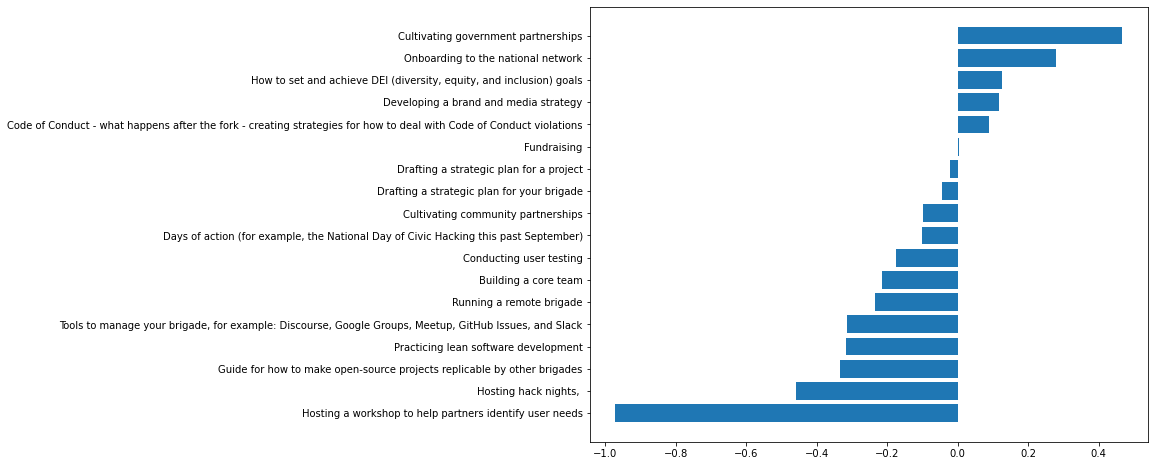

In [46]:
plt.figure(figsize=(10, 8))
myplot = plt.barh(sizedf['task'], sizedf['diff'])

In [47]:
meetup

,Brigade Name,City,State,Meetup URL,"Meetup ""members""",most recent Meetup,RSVPs,comment,Mtg frequency
0,Code for Anchorage,Anchorage,AK,https://www.meetup.com/Code-for-Anchorage,284,11/10/20,2.0,hack night,monthly
1,Code for Phoenix,Phoenix,AZ,https://www.meetup.com/CodeforPhoenix/,303,10/13/20,2.0,Brigade Congress,irregular
2,Code for Tucson,Tucson,AZ,https://www.meetup.com/Code-for-Tucson/,1052,11/4/20,3.0,Code class,irregular
3,Code for Fresno,Fresno,CA,https://www.meetup.com/Code-for-Fresno/,182,9/12/20,4.0,NDOCH,irregular
4,Code for Sacramento,Sacramento,CA,https://www.meetup.com/Code4Sac,2.023,11/20/20,4.0,speaker,monthly plus
5,Code for San Francisco,San Francisco,CA,https://www.meetup.com/Code-for-San-Francisco-...,"6,322",11/18/20,10.0,hack night,monthly
6,Code for San Jose,San Jose,CA,https://www.meetup.com/Code-for-San-Jose,"3,178",11/19/20,23.0,hack night,bi-weekly
7,Code for Sonoma County,Santa Rosa,CA,https://www.meetup.com/Code-for-Sonoma-County/,77,5/5/20,2.0,meeting,irregular
8,Hack for LA Brigade,Los Angeles,CA,https://www.meetup.com/hackforla/,"4,986",11/17/20,3.0,happy hour,>2x/week
9,Open Oakland,Oakland,CA,https://www.meetup.com/OpenOakland/,"2,281",11/17/20,11.0,hack night,weekly


## Question 5: do the tasks all vary together in a way that makes sense for us to think about an overall "preparedness index"? Or do some of the tasks vary in a way that is independent of the others?

In [48]:
resp

,Timestamp,Brigade,task,value,over_or_equal_4
0,9/15/20 10:16,Open San Diego,"Hosting hack nights,",3.0,False
1,9/18/20 11:03,Code for Fort Collins,"Hosting hack nights,",2.0,False
2,10/1/20 18:10,Code for Boston,"Hosting hack nights,",1.0,False
3,10/7/20 11:09,Code for Boston,"Hosting hack nights,",1.0,False
4,10/20/20 8:50,Code for Asheville,"Hosting hack nights,",3.0,False
...,...,...,...,...,...
1309,4/30/21 8:21,Code for Little Rock,"How to set and achieve DEI (diversity, equity,...",1.0,False
1310,5/5/21 15:31,Code for Connecticut,"How to set and achieve DEI (diversity, equity,...",4.0,True
1311,12/17/20 12:47,Open Seattle,"How to set and achieve DEI (diversity, equity,...",5.0,True
1312,5/29/21 16:30,Code for Atlanta,"How to set and achieve DEI (diversity, equity,...",3.0,False


In [57]:
total_wide = pd.pivot_table(resp,
                           index = 'Brigade',
                           columns = 'task',
                           values = 'value').reset_index()

In [58]:
total_wide.head()
total_wide.drop('Brigade', axis=1, inplace=True)

In [60]:
total_wide = total_wide.fillna(total_wide.mean())

In [61]:
pca = prince.PCA(n_components=2, rescale_with_mean=True, rescale_with_std=True)
pca = pca.fit(total_wide)

In [62]:
loadings = pca.column_correlations(total_wide)
loadings.columns = ['dim1', 'dim2']
loadings.sort_values('dim1')

,dim1,dim2
Code of Conduct - what happens after the fork - creating strategies for how to deal with Code of Conduct violations,0.179807,-0.028253
"Days of action (for example, the National Day of Civic Hacking this past September)",0.242883,0.469511
Onboarding to the national network,0.332243,0.471747
Fundraising,0.358636,-0.011876
Developing a brand and media strategy,0.358982,0.226740
"How to set and achieve DEI (diversity, equity, and inclusion) goals",0.424250,-0.250328
Drafting a strategic plan for your brigade,0.446946,0.140360
Running a remote brigade,0.449223,0.039327
Building a core team,0.483635,-0.459770
Cultivating government partnerships,0.503574,-0.679920
